<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./2_4_iono_corr_solarstorms.ipiynb" target="_blank"><< Ionospheric correction solar storms</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Vinca Rosmorduc (CLS)

<html>
<div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-s6"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=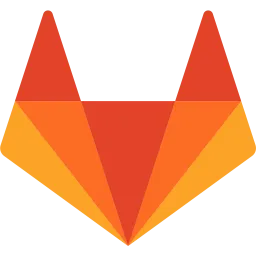" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://user.eumetsat.int/search-view?sort=startDate%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CSoftware%20%26%20code%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D,%22org-satellite-sensor%22:%5B%22EUMETSAT%7CSentinel-6%22,%22EUMETSAT%7CSentinel-6%7CAMR-C%22,%22EUMETSAT%7CSentinel-6%7CDORIS%22,%22EUMETSAT%7CSentinel-6%7CGNSS-RO%22,%22EUMETSAT%7CSentinel-6%7CLRA%22,%22EUMETSAT%7CSentinel-6%7CPoseidon-4%22%5D%7D"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg?style=flat&logo=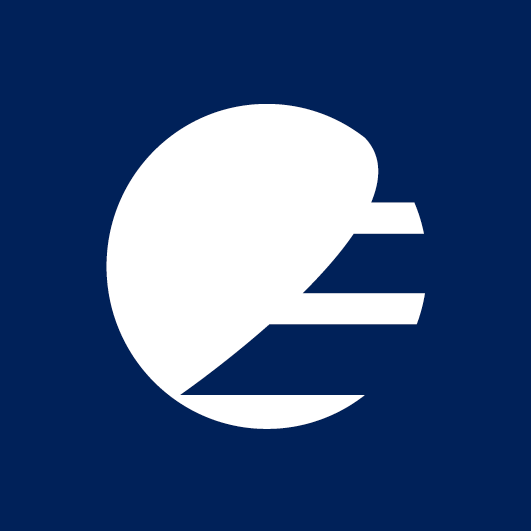" alt="Open in user portal"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-s6/HEAD?labpath=2_S6_advanced%2F2_5_acquire_S6_available_cycles.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Launch on Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/learn-s6/2_S6_advanced/2_5_acquire_S6_available_cycles.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Launch on WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div> 
</html>

<div class="alert alert-block alert-success">
<h3>Learn Sentinel-6: Advanced</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** to use the EUMETSAT Data Store
    
There are no prerequisite notebooks for this module.
</div>
<hr>

# 2.5 Acquiring a Sentinel-6 track over all available cycles

### Data used

| Dataset | EUMETSAT collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:--------:|
| Sentinel-6 Poseidon-4 Altimetry level 2 High Resolution  | EO:EUM:DAT:0855 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0855" target="_blank">Description</a> | EO:EUM:DAT:0855| <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3A0855" target="_blank">Description</a> |
| Sentinel-6 Poseidon-4 Altimetry level 2 High Resolution (baseline version F08; reprocessed)  | EO:EUM:DAT:0841 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0841" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-6:0841| <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-6%3A0841" target="_blank">Description</a> |


### Learning outcomes

At the end of this notebook you will know;
* <font color="#138D75">**Search**</font> for a time series of L2 Sentinel-6 data for a given cycle number using the EUMETSAT Data Store API client (`eumdac`)
* <font color="#138D75">**Download**</font> this time series

### Outline

The EUMETSAT Data Store offers many ways to interact with data in order to refine searches. Many of these methods are supported by the EUMETSAT Data Access Client (`eumdac`). In this notebook we will showcase some of the possibilities for using `eumdac` to better interact with Sentinel-6 collections.

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
1. [Step 1: Authenticating the API](#section1)
1. [Step 2: Creating a search for products](#section2)
1. [Step 3: Downloading the data](#section4)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [20]:
import os                              # a library that allows us access to basic operating system commands
import glob                            # a library that helps us search for files
import json                            # a library that helps us make JSON format files
import eumdac                          # a tool that helps us download via the eumetsat/data-store
import datetime                        # a library that allows us to work with dates and times
import shutil                          # a library that allows us access to basic operating system commands like copy
import zipfile                         # a library that support zipping/unzipping files
import xarray                          # a library that helps us work efficiently with multi-dimensional arrays
import matplotlib                      # a library the provides plotting capability
import matplotlib.pyplot as plt        # a library the provides plotting capability
import cartopy                         # a library that supports mapping and projection
import cartopy.crs as ccrs             # a library that supports mapping and projection
import numpy as np                     # a library that lets us work with arrays; we import this with a new name "np"
from pathlib import Path               # a library that helps construct system path objects

# Create a download directory for our Sentinel-6 products
#download_dir = os.path.join(os.getcwd(), "products")
download_dir = "products/"
os.makedirs(download_dir, exist_ok=True)

<div class="alert alert-info" role="alert">

## <a id='section1'></a>Step 1: Authenticating the API
[Back to top](#TOC_TOP)

</div>

Before we use the Data Store to download data, we must first authenticate our access and retrieve an access token. More **essential** information on setting this up can be found in the **<a href="../1_S6_introductory/1_1b_S6_data_access_DS.ipynb">1_1b_S6_data_access_DS</a>** notebook.

In [21]:
# load credentials
file_credentials = True

if file_credentials == True:
    credentials_file = os.path.join(os.path.expanduser("~"),'.eumdac','credentials')
    credentials = Path(credentials_file).read_text().split(',')
    token = eumdac.AccessToken((credentials[0], credentials[1]))
    print(f"This token '{token}' expires {token.expiration}")
else:
    # see below for more information
    token = eumdac.AccessToken(("consumer_key", "consumer_secret"))

This token 'b31d6885-8e62-356b-9c4f-abe2d7f67637' expires 2024-05-06 16:03:50.955313


In [22]:
datastore = eumdac.DataStore(token)

We will take the Level 2 high resolution data for the whole availability of these data from Sentinel-6, whether the data are reprocessed or operational.
Now, we have several version of the Level-2 reprocessed data in the catalogue. Except for very specific studies, you should take the latest version - it should be the one homogeneous with the operational version.

In [43]:
#list the relevant Sentinel-6 collection IDs and store them in a list to access them.
version_number = 6
list_colIDs = []
for collection_id in datastore.collections:
    if ("Poseidon-4 Altimetry Level 2 High Resolution" in collection_id.title):
        if ("baseline version" in collection_id.title):
            if version_number < int(collection_id.title[64:66]):
                version_number = int(collection_id.title[64:66])
                list_colIDs.append(str(collection_id))
        else:
            list_colIDs.append(str(collection_id))
            if "non-public" in collection_id.abstract: continue
#print(f"Collection ID({collection_id}): {collection_id.title}")
print(list_colIDs)

['EO:EUM:DAT:0855', 'EO:EUM:DAT:0841']


<div class="alert alert-info" role="alert">

## <a id='section2'></a>Step 2: Creating a search for products
[Back to top](#TOC_TOP)

</div>

In [58]:
# set collection ID for S6 Poseidon-4 L2 high resolution products
#collectionID = 'EO:EUM:DAT:0842'
relorbit = '63'
direction = 'DESCENDING'
timeliness = 'NT'
for collectionID in list_colIDs:
    selected_collection = datastore.get_collection(collectionID)
    products = selected_collection.search(
        relorbit=relorbit,
        orbitdir=direction,
        timeliness=timeliness)
    
    for product in products:
        print(product)

S6A_P4_2__HR______20240306T081946_20240306T091559_20240506T134323_3373_122_126_063_EUM__OPE_NT_F09.SEN6
S6A_P4_2__HR______20240225T102114_20240225T111727_20240321T065033_3373_121_126_063_EUM__OPE_NT_F08.SEN6
S6A_P4_2__HR______20240215T122243_20240215T131856_20240309T185641_3373_120_126_063_EUM__OPE_NT_F08.SEN6
S6A_P4_2__HR______20240205T142412_20240205T152025_20240301T051255_3373_119_126_063_EUM__OPE_NT_F08.SEN6
S6A_P4_2__HR______20240126T172153_20240126T181806_20240221T023004_3373_118_127_063_EUM__OPE_NT_F08.SEN6
S6A_P4_2__HR______20240116T182709_20240116T192322_20240209T093929_3373_117_126_063_EUM__OPE_NT_F08.SEN6
S6A_P4_2__HR______20240106T212450_20240106T222103_20240131T012841_3373_116_127_063_EUM__OPE_NT_F08.SEN6
S6A_P4_2__HR______20231227T223006_20231227T232619_20240120T212113_3373_115_126_063_EUM__OPE_NT_F08.SEN6
S6A_P4_2__HR______20231218T012746_20231218T022359_20240111T035054_3373_114_127_063_EUM__OPE_NT_F08.SEN6
S6A_P4_2__HR______20231218T003134_20231218T012746_20240111T03470

take:
- only the reprocessed for a given date (i.e. all the reprocessed, then only begin taking the operational)
- the NT, then the ST when there's no more NT ??

<div class="alert alert-info" role="alert">

## <a id='section3'></a>Step 3: Downloading the products
[Back to top](#TOC_TOP)

</div>

We have narrowed our search to a the required cycle and can now download them using the code below. This will write them into our specified directory and unzip them.

*Note that here we are not using the ROI filtered list from the previous code cell.*

<hr>
<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./2_4_iono_corr_solarstorms.ipiynb" target="_blank"><< Ionospheric correction solar storms</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>